# Random Forests

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

## Data Manipulation

In [4]:
maldata=pd.read_csv('./malware.csv',sep='|')
print(maldata.head(1))

x=maldata.drop(['Name', 'md5', 'legitimate'], axis=1).values
y=maldata['legitimate'].values

print(x.shape)
feature_select_model=ExtraTreesClassifier()
feature_select_model.fit(x,y)
model = SelectFromModel(feature_select_model, prefit=True)
x=model.transform(x)
print(x.shape)

number_of_samples=len(y)

random_indices=np.random.permutation(number_of_samples)

num_train=int(number_of_samples*0.7)
num_test=int(number_of_samples*0.30)

x_train=x[random_indices[:num_train]]
y_train=y[random_indices[:num_train]]

x_test=x[random_indices[num_train:]]
y_test=y[random_indices[num_train:]]

          Name                               md5  Machine  \
0  memtest.exe  631ea355665f28d4707448e442fbf5b8      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   

   SizeOfUninitializedData     ...      ResourcesNb  ResourcesMeanEntropy  \
0                        0     ...                4              3.262823   

   ResourcesMinEntropy  ResourcesMaxEntropy  ResourcesMeanSize  \
0             2.568844             3.537939             8797.0   

   ResourcesMinSize  ResourcesMaxSize  LoadConfigurationSize  \
0               216             18032                      0   

   VersionInformationSize  legitimate  
0                      16           1  

[1 rows x 57 columns]
(138047, 54)
(138047, 14)


## Random Forrest

In [6]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

y_predtrain=model.predict(x_train)
print("Train Accuracy:",metrics.accuracy_score(y_train,y_predtrain)*100)

y_predtest=model.predict(x_test)
print("Test Accuracy:",metrics.accuracy_score(y_test,y_predtest)*100)

Train Accuracy: 99.9441178906
Test Accuracy: 99.2780393577


## Null Accuracy

In [11]:
print(max(y_test.mean(), 1 - y_test.mean())*100)

69.8973801763


## Confusion Matrix

In [26]:
confusion=confusion_matrix(y_test,y_predtest)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

# Accuracy
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN)*100)

#Misclassification
print('Misclassification:',(FP+FN)/float(TP+TN+FP+FN)*100)

#Sensitivity
print('Sensitivity:',(TP)/float(TP+FN)*100)

#Specificity
print('Specificty:',(TN)/float(TN+FP)*100)

#Flase Positive Rate
print('False Positive:',(FP)/float(TN+FP)*100)

#Precision Score
print('Precision Score:', (TP)/float(TP+FP)*100)


Accuracy: 99.3393602225
Misclassification: 0.660639777469
Sensitivity: 98.9048991354
Specificty: 99.5270102066
False Positive: 0.472989793378
Precision Score: 98.9048991354


## ROC AUC

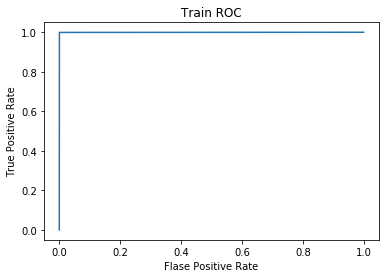

Train AUC: 99.9323023961


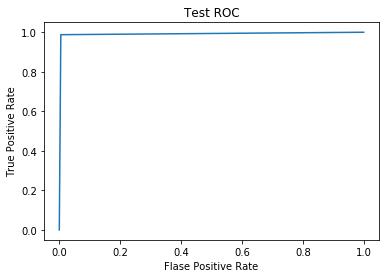

Test AUC: 99.1319203743
Mean Cross-Val AUC Score: 99.1119408621


In [10]:
fpr,tpr,threshold=metrics.roc_curve(y_train,y_predtrain)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.show()

print("Train AUC:",metrics.roc_auc_score(y_train,y_predtrain)*100)



fpr,tpr,threshold=metrics.roc_curve(y_test,y_predtest)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.show()

print("Test AUC:",metrics.roc_auc_score(y_test,y_predtest)*100)



print("Mean Cross-Val AUC Score:",cross_val_score(model, x, y, cv=10, scoring='roc_auc').mean()*100)

# Tuning 

1) n_estimators: Number of decision trees to be used. Between 500-1000.

2) max_features: Maximim number of features random forrest can select for training

3) min_sample_leaf: Minimum number of samples in newly created trees.

In [34]:
param_grid={
    
    "n_estimators" : [50],
    "max_features" : [3,4,7],
    "min_samples_leaf" : [40]
}

In [33]:
tuned_classifier=GridSearchCV(model,param_grid,cv=10,scoring='accuracy')
tuned_classifier.fit(x,y)

print(tuned_classifier.best_score_)
print(tuned_classifier.best_params_)
print(tuned_classifier.best_estimator_)

0.9822379334574457
{'max_features': 3, 'min_samples_leaf': 60, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=60, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Train model with best parameters

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

## Results

In [ ]:
y_predtrain=model.predict(x_train)
print("Train Accuracy:",metrics.accuracy_score(y_train,y_predtrain)*100)

y_predtest=model.predict(x_test)
print("Test Accuracy:",metrics.accuracy_score(y_test,y_predtest)*100)

In [ ]:
confusion=confusion_matrix(y_test,y_predtest)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

# Accuracy
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN)*100)

#Misclassification
print('Misclassification:',(FP+FN)/float(TP+TN+FP+FN)*100)

#Sensitivity
print('Sensitivity:',(TP)/float(TP+FN)*100)

#Specificity
print('Specificty:',(TN)/float(TN+FP)*100)

#Flase Positive Rate
print('False Positive:',(FP)/float(TN+FP)*100)

#Precision Score
print('Precision Score:', (TP)/float(TP+FP)*100)

In [ ]:
fpr,tpr,threshold=metrics.roc_curve(y_train,y_predtrain)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.show()

print("Train AUC:",metrics.roc_auc_score(y_train,y_predtrain))



fpr,tpr,threshold=metrics.roc_curve(y_test,y_predtest)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.show()

print("Test AUC:",metrics.roc_auc_score(y_test,y_predtest))